**House Price Prediction Model**

Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

import joblib

Pre-processing

In [2]:
data = pd.read_csv('House Price India.csv')


In [3]:
# Show basic info about columns, data types, and non-null counts
print("\n--- Data Info ---")
print(data.info())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-nu

In [4]:
#Basic Statistics of Target Variable (Price)
# Describe the "Price" column: count, mean, std, min, quartiles, max
stats = data["Price"].describe().reset_index()

# Round the statistics values to 2 decimal places for better readability
stats["Price"] = stats["Price"].round(2)

print("\n--- Price Statistics ---")
print(stats)


--- Price Statistics ---
   index       Price
0  count    14619.00
1   mean   538806.28
2    std   367229.36
3    min    78000.00
4    25%   320000.00
5    50%   450000.00
6    75%   645000.00
7    max  7700000.00


In [5]:
#Check Missing and Duplicate Values

# Total number of missing values in the entire DataFrame
total_missing = data.isna().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")

# Total number of fully duplicated rows
total_duplicates = data.duplicated().sum()
print(f"Total duplicated rows in dataset: {total_duplicates}")



Total missing values in dataset: 0
Total duplicated rows in dataset: 0


In [ ]:
#Handle Missing and Duplicate Values

# Drop rows with any missing value
data.dropna(inplace=True)

# Drop exactly duplicated rows
data.drop_duplicates(inplace=True)

print("\n--- Data after cleaning (head) ---")
print(data.head())


--- Data after cleaning (head) ---
           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  

Simple Visualization : Condition of the house vs Average Price

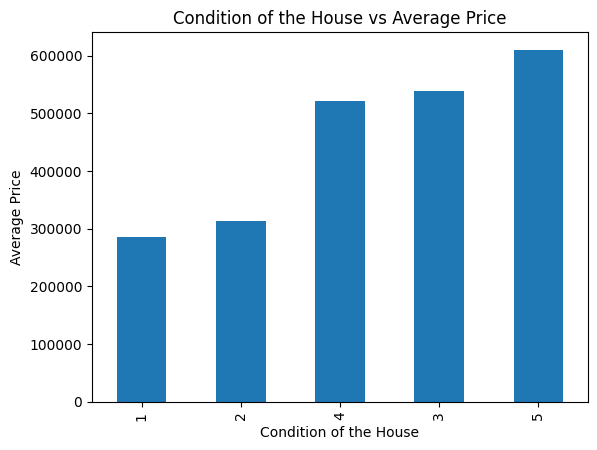

In [7]:
data.groupby("condition of the house")["Price"].mean().sort_values(ascending=True).plot(kind='bar')
plt.title("Condition of the House vs Average Price")
plt.ylabel("Average Price")
plt.xlabel("Condition of the House")
plt.show()

Define Features (X) and Target (y)

In [13]:
X = data[['number of bedrooms','number of bathrooms','living area','condition of the house','Number of schools nearby']]

X

,number of bedrooms,number of bathrooms,living area,condition of the house,Number of schools nearby
0,4,2.50,2920,5,2
1,5,2.75,2910,3,1
2,4,2.50,3310,3,3
3,3,2.00,2710,4,1
4,3,2.50,2600,4,1
...,...,...,...,...,...
14614,2,1.50,1556,4,3
14615,3,2.00,1680,4,3
14616,2,1.00,1070,3,2
14617,4,1.00,1030,4,3


In [11]:
y = data["Price"]

y

0        1400000
1        1200000
2         838000
3         805000
4         790000
          ...   
14614     221700
14615     219200
14616     209000
14617     205000
14618     146000
Name: Price, Length: 14619, dtype: int64

Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

print("\nTraining set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Training set size: (11695, 5) (11695,)
Test set size: (2924, 5) (2924,)


Decision Tree Regressor with GridSearchCV

In [15]:
param_grid_tree = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [16]:
# Base Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

In [18]:
# GridSearchCV tries all combinations of parameters and picks the best
grid_tree = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid_tree,
    scoring="neg_mean_squared_error",  # we want to minimize MSE                         # use all CPU cores
)

In [19]:
# Fit the model on training data
grid_tree.fit(X_train, y_train)

print("\n--- Best Parameters for Decision Tree ---")
print(grid_tree.best_params_)


--- Best Parameters for Decision Tree ---
{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [20]:
# Predictions on test set using best Decision Tree model
tree_preds = grid_tree.predict(X_test)

In [21]:
# Evaluate Decision Tree
tree_mse = mean_squared_error(y_test, tree_preds)
tree_mae = mean_absolute_error(y_test, tree_preds)

print("\nDecision Tree Performance:")
print("MSE:", tree_mse)
print("MAE:", tree_mae)


Decision Tree Performance:
MSE: 67739876625.71646
MAE: 161090.87323793155


Linear Regression Model

In [22]:
# Initialize Linear Regression model
lr = LinearRegression()

In [23]:
# Train on training data
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# Predict on test data
lr_preds = lr.predict(X_test)

In [25]:
# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)

print("\nLinear Regression Performance:")
print("MSE:", lr_mse)
print("MAE:", lr_mae)


Linear Regression Performance:
MSE: 65514176740.267784
MAE: 165026.2962930765


Random Forest Regressor with GridSearchCV

In [26]:
# Base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [27]:
# Parameter grid for Random Forest
param_grid_rf = {
    "max_depth": [5, 10, 15],
    "n_estimators": [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [28]:
# GridSearchCV for Random Forest
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring="neg_mean_squared_error"
)

In [29]:
# Fit Random Forest with GridSearch on training data
grid_rf.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [2, 3, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,9


In [30]:
print("\n--- Best Parameters for Random Forest ---")
print(grid_rf.best_params_)


--- Best Parameters for Random Forest ---
{'max_depth': 5, 'n_estimators': 9}


In [31]:
# Predictions with best Random Forest model
rf_preds = grid_rf.predict(X_test)

In [32]:
# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

print("\nRandom Forest Performance:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)


Random Forest Performance:
MSE: 61319014579.76153
MAE: 158602.34822515058


Save the Best Model

In [ ]:
#Save best model as pkl file
joblib.dump(grid_rf, 'model1.pkl')

['model1.pkl']